# 写在前面的话，虽然这篇文章是关于代码的。会让大家头大，但是......我把逻辑脉络整理了整理，而且条理清晰，哈哈哈 大家还是可以看的

* 写程序在Jupyter Notebook 
* 环境anadona3+python3.6+tensorflow 1.11

* 插个吐槽的话，这破环境我配置了3个小时，大早上的啥都没干好难受！！

##  写程序首先导入你用到的包（一堆别人给你写好的函数）你直接调用就好了

In [2]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

##  看看处理的数据是什么

In [3]:
df = pd.read_csv('ex1data1.txt', names=['population', 'profit'])#读取数据并赋予列名
df.head()#看前五行

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## 图片显示看看！！

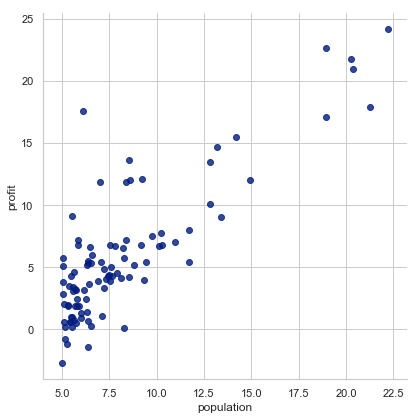

In [5]:
sns.lmplot('population', 'profit', df, height=6, fit_reg=False)
plt.show()

## 数据明白了，接下来就是算法处理

* 由于算法里面有循环，所以咱们要先吧小的函数写好，然后进入大的循环环境中

In [ ]:
data = pd.read_csv('ex1data1.txt', names=['population', 'profit'])#读取数据，并赋予列名
def get_X(df):#读取特征
    
    ones = pd.DataFrame({'ones': np.ones(len(df))})#ones是m行1列的dataframe
    data = pd.concat([ones, df], axis=1)  # 合并数据，根据列合并
    return data.iloc[:, :-1].values   # 这个操作返回 ndarray,不是矩阵


def get_y(df):#读取标签
    
    return np.array(df.iloc[:, -1])#df.iloc[:, -1]是指df的最后一列



### 多变量的假设 h 表示为：\\[{{h}_{\theta }}\left( x \right)={{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 
这个公式中有n+1个参数和n个变量，为了使得公式能够简化一些，引入${{x}_{0}}=1$，则公式转化为：  
此时模型中的参数是一个n+1维的向量，任何一个训练实例也都是n+1维的向量，特征矩阵X的维度是 m*(n+1)。 因此公式可以简化为：${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X$，其中上标T代表矩阵转置。

In [15]:
X = get_X(data)
print(X.shape, type(X)) # 97 * 2 矩阵

y = get_y(data)
print(y.shape, type(y)) # 97 * 1 矩阵
#看下数据维度

(97, 2) <class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>


In [16]:
theta = np.zeros(X.shape[1])#X.shape[1]=2,代表特征数n

###  计算代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 


In [17]:
def lr_cost(theta, X, y):
#     """
#    X: R(m*n), m 样本数, n 特征数
#     y: R(m)
#     theta : R(n), 线性回归的参数
#     """
    m = X.shape[0]#m为样本数

    inner = X @ theta - y  # R(m*1)，X @ theta等价于X.dot(theta)

    # 1*m @ m*1 = 1*1 in matrix multiplication
    # but you know numpy didn't do transpose in 1d array, so here is just a
    # vector inner product to itselves
    square_sum = inner.T @ inner
    cost = square_sum / (2 * m)

    return cost

In [18]:
lr_cost(theta, X, y)#返回theta的值，#初步计算最大的损失值（theta =[0,0]）

32.072733877455676

###  batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [19]:
def gradient(theta, X, y):#定义一次的梯度值，对应公式中求导
    
    m = X.shape[0]

    inner = X.T @ (X @ theta - y)  # (m,n).T @ (m, 1) -> (n, 1)，X @ theta等价于X.dot(theta)

    return inner / m

In [20]:
def batch_gradient_decent(theta, X, y, epoch, alpha=0.01):
#   拟合线性回归，返回参数和代价
#     epoch: 批处理的轮数
#     """
    cost_data = [lr_cost(theta, X, y)]
    _theta = theta.copy()  # 拷贝一份，不和原来的theta混淆

    for _ in range(epoch):
        _theta = _theta - alpha * gradient(_theta, X, y)
        cost_data.append(lr_cost(_theta, X, y))

    return _theta, cost_data
#批量梯度下降函数

In [21]:
epoch = 500
final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch)

In [22]:
final_theta

array([-2.28286727,  1.03099898])

In [23]:
# 计算最终的代价
lr_cost(final_theta, X, y)

4.713809531116866

###  visualize cost data（代价数据可视化）

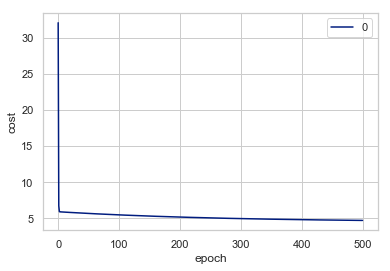

In [35]:
index =np.arange(epoch+1)
wide_df = pd.DataFrame(cost_data, index)
ax = sns.lineplot(data=wide_df)
ax.set_ylabel('cost')
ax.set_xlabel('epoch')
plt.show()
#可以看到从第二轮代价数据变换很大，接下来平稳了

### 整体拟合效果

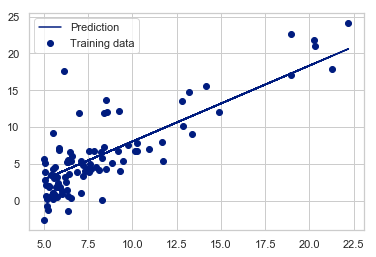

In [28]:
b = final_theta[0] # intercept，Y轴上的截距
m = final_theta[1] # slope，斜率

plt.scatter(data.population, data.profit, label="Training data")
plt.plot(data.population, data.population*m + b, label="Prediction")
plt.legend(loc=2)
plt.show()